In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA


import statsmodels.api as stm
import statsmodels.stats.weightstats as ws
import math

In [11]:
donnee = pd.read_csv('./Fichiers/DonneesAppartv0r6.csv')
donnee=donnee.dropna()
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

nomsvariables

,0
0,Âge de l'appart. (ans)
1,Surface (pi2)
2,Étage
3,Places stationnement. ext.
4,Places stationnement. int.
5,Nb édifices dans complexe
6,Nb. ascenseurs
7,Nb. écoles élémentaires
8,Nb. écoles secondaires
9,Nb. universités


In [16]:
## var dépend
colY = 'Prix de vente ($)'


donnee.describe().apply(lambda x: x.round(2))

,Âge de l'appart. (ans),Surface (pi2),Étage,Places stationnement. ext.,Places stationnement. int.,Nb édifices dans complexe,Nb. ascenseurs,Nb. écoles élémentaires,Nb. écoles secondaires,Nb. universités,Nb. total établissements scolaires,Prix de vente ($)
count,350.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00
mean,8.66,1065.56,11.99,242.13,503.41,4.86,11.48,3.08,4.93,2.71,10.73,198884.51
std,8.31,430.24,8.32,246.18,389.86,2.70,7.77,0.96,2.62,1.70,4.88,118059.14
min,0.00,355.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,4.00,35398.00
25%,1.00,644.00,5.00,7.00,76.00,2.00,5.00,2.00,2.00,1.00,6.00,92035.00
50%,3.00,914.00,11.00,123.00,536.00,6.00,10.00,3.00,5.00,2.00,10.00,176991.00
75%,15.00,1394.00,17.00,523.00,605.00,8.00,20.00,4.00,8.00,5.00,17.00,294603.75
max,30.00,2337.00,43.00,713.00,1270.00,8.00,27.00,6.00,8.00,5.00,17.00,465486.00


In [8]:
donnee.isnull().sum()

Âge de l'appart. (ans)                0
Surface (pi2)                         0
Étage                                 0
Places stationnement. ext.            0
Places stationnement. int.            0
Nb édifices dans complexe             0
Nb. ascenseurs                        0
Nb. écoles élémentaires               0
Nb. écoles secondaires                0
Nb. universités                       0
Nb. total établissements scolaires    0
Prix de vente ($)                     0
dtype: int64

In [ ]:
### dataframe semble clean. No nulls, no negatives, tout numérique


In [18]:
### obtenons les X et Y
#donnee.columns.values
#donnee['Prix de vente ($)']
dfX = donnee.drop(colY, axis=1).copy()
dfY = donnee[colY].copy()

In [4]:
## fonction pour imprimer le résultat d'une regréssion linéaire
def print_summary(pDfX, pColY):
    modele=sm.OLS(pColY,pDfX.assign(const=1))
    resultats=modele.fit()
    Y_chap = resultats.predict(pDfX.assign(const=1))
    print(resultats.summary()   )
     

In [19]:
print_summary(dfX, dfY)

                            OLS Regression Results                            
Dep. Variable:      Prix de vente ($)   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     344.7
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          5.93e-171
Time:                        20:42:46   Log-Likelihood:                -4161.5
No. Observations:                 350   AIC:                             8345.
Df Residuals:                     339   BIC:                             8387.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Âge 

\------------------\
Q2.1 - réponse

On observe que:
- la précision du modèle en principe est très élevé (adj. R2 = 0.908)
- les variables indépendantes sont plutôt importantes. Seulement 'Places stationnement. int.'
et 'Nb. universités' on un p-value > 0.05
-  il y a de la colinéarité telle qu'indiqué dans la section "Notes" et aussi on peut se méfier que
'Nb. total établissements scolaires' varie ensemble avec les variables 'Nb. écoles élémentaires', 
'Nb. écoles secondaires' et 'Nb. universités'
\-----------------------\

\------------------\
Q2.2 - VIF ---> je reviens si le temps me permet
\------------------\

In [21]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dfX.columns

# calculating VIF for each feature

vif_data["VIF"] = [vif(dfX.values, i)
                          for i in range(len(dfX.columns))]

vif_data.sort_values(by="VIF", axis=0, kind="quicksort",  ascending=False)

NameError: name 'vif' is not defined

In [ ]:
"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"VIF"

#'Nb. total établissements scolaires' varie ensemble avec les variables 'Nb. écoles élémentaires', 
#'Nb. écoles secondaires' et 'Nb. universités'

X = dfX

X1=X['Nb. total établissements scolaires']
X2=X['Nb. écoles élémentaires']
X3=X['Nb. universités']
X4=X['Nb. écoles secondaires']

X1=X["Temps entreposage (jours)"]
X_not1=X[["Couleur (a-band)","Lycopene (mg/100g)"]]
modele=sm.OLS(X1,X_not1)
resultats=modele.fit()
resultats.summary()
VIF1=1/(1-resultats.rsquared)

X2=X["Couleur (a-band)"]
X_not2=X[["Temps entreposage (jours)","Lycopene (mg/100g)"]]
modele=sm.OLS(X2,X_not2)
resultats=modele.fit()
resultats.summary()
VIF2=1/(1-resultats.rsquared)

X3=X["Lycopene (mg/100g)"]
X_not3=X[["Couleur (a-band)","Temps entreposage (jours)"]]
modele=sm.OLS(X3,X_not3)
resultats=modele.fit()
resultats.summary()
VIF3=1/(1-resultats.rsquared)


from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]

\---------------\
Q2.3
\--------------\

<AxesSubplot: >

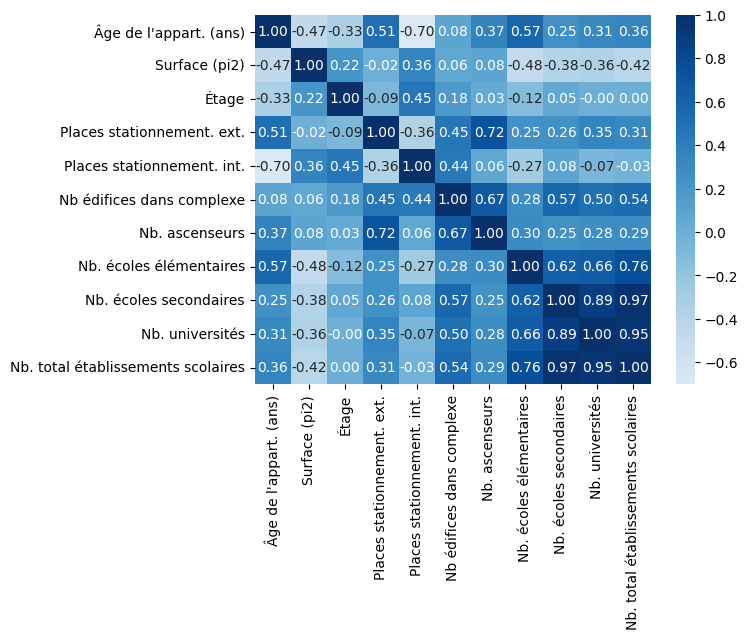

In [24]:
#dfX.corr()
import seaborn as sns
sns.heatmap(dfX.corr(), cbar=True, cmap="Blues", center=0, annot=True, fmt=".2f")

In [27]:
## on va éliminer celles que l'on soupçonne être hautement corrélées
## l'ahute corrélation est confirmée par le heatmap
lstExclusion = [    
 'Nb. écoles élémentaires'
, 'Nb. universités'
, 'Nb. écoles secondaires']
dfX_reduced = dfX.loc[:, ~dfX.columns.isin(lstExclusion)].copy()
dfX_reduced.columns.values

array(["Âge de l'appart. (ans)", 'Surface (pi2)', 'Étage',
       'Places stationnement. ext.', 'Places stationnement. int.',
       'Nb édifices dans complexe', 'Nb. ascenseurs',
       'Nb. total établissements scolaires'], dtype=object)

In [28]:
print_summary(dfX_reduced, dfY)

                            OLS Regression Results                            
Dep. Variable:      Prix de vente ($)   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     420.0
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.74e-171
Time:                        21:03:00   Log-Likelihood:                -4166.5
No. Observations:                 350   AIC:                             8351.
Df Residuals:                     341   BIC:                             8386.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Âge 

In [31]:
## on essaye de réduire d'avantage. La superficie
lstExclusion = ['Nb édifices dans complexe','Places stationnement. ext.', 'Nb. ascenseurs']
dfX_reduced_2 = dfX_reduced.loc[:, ~dfX_reduced.columns.isin(lstExclusion)].copy()
print_summary(dfX_reduced_2, dfY)

                            OLS Regression Results                            
Dep. Variable:      Prix de vente ($)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     585.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          9.00e-166
Time:                        21:09:58   Log-Likelihood:                -4189.7
No. Observations:                 350   AIC:                             8391.
Df Residuals:                     344   BIC:                             8415.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Âge 

\-----------------------\
Q2.3 - réponse
Au deuxième tour d'elimination de variable:
- On a encore un problème de colinéarité 
- On a une bonne précion (adj r2 = 0.893)

\---------------------------\

\---------------------\
Q2.4 - standardisation X et Y
\---------------------\

In [32]:
"Stardardisation"

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def get_Xstand(pDf):
    scalerX = StandardScaler()
    Xstand = scalerX.fit_transform(pDf.values)
    Xstand=pd.DataFrame(Xstand)
    return Xstand
    #Xstand.columns=pDf.columns

In [39]:
dfX_stand = get_Xstand(dfX_reduced_2)
dfY_stand = get_Xstand(dfY.to_frame())
print(dfY.to_frame().columns.values)
print(dfX_stand.columns.values)
print(dfX_reduced_2.columns.values)
print_summary(dfX_stand, dfY_stand)

['Prix de vente ($)']
[0 1 2 3 4]
["Âge de l'appart. (ans)" 'Surface (pi2)' 'Étage'
 'Places stationnement. int.' 'Nb. total établissements scolaires']
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     585.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          9.00e-166
Time:                        21:16:48   Log-Likelihood:                -102.56
No. Observations:                 350   AIC:                             217.1
Df Residuals:                     344   BIC:                             240.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

\-----------------------\
Q2.4 - Réponse

- À part la constant, toutes les variables sont significatives
- Le modèle a une bonne précision (adj r2 = 0.893)
- Les valeurs semblent avoir du bon sens. PAr exemple, si l'âge (var [0]) augmente, le prix de vente descend.
Pourtant, je serais un doûte de pourquoi le nb d'établissement scolaires seraint négativement correlé avec le prix
de vente.
Pour les autres variables, surface, étage, place stationnement intérieure, ça a du bon sens qu'ellent 
varient positivement avec le prix de vente

[0 1 2 3 4]
["Âge de l'appart. (ans)" 
'Surface (pi2)' 
'Étage'
 'Places stationnement. int.' 
 'Nb. total établissements scolaires']



\-----------------------\